# Yolov5 model by using custom data in order to detect the person state like he's sleepy or awake

### Install  Dependendent Packages

In [1]:
!pip install torch==1.8.1+cu111 torchvision==0.9.1+cu111 torchaudio===0.8.1 -f https://download.pytorch.org/whl/lts/1.8/torch_lts.html

Looking in links: https://download.pytorch.org/whl/lts/1.8/torch_lts.html


ERROR: Could not find a version that satisfies the requirement torch==1.8.1+cu111 (from versions: 1.11.0, 1.12.0, 1.12.1)
ERROR: No matching distribution found for torch==1.8.1+cu111


### importing the libraries

In [4]:
pip install torchviz

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     -------------------------------------- 47.0/47.0 kB 261.0 kB/s eta 0:00:00
  Created wheel for torchviz: filename=torchviz-0.0.2-py3-none-any.whl size=4131 sha256=e4e325bafd69b8790b0c7216e0da2267954ab92c92a63c6c3aa7fe6e699110e8
  Stored in directory: c:\users\headway\appdata\local\pip\cache\wheels\4c\97\88\a02973217949e0db0c9f4346d154085f4725f99c4f15a87094
Successfully built torchviz
Note: you may need to restart the kernel to use updated packages.


In [5]:
import torch
from matplotlib import pyplot as plt
import numpy as np
import cv2
from torchviz import make_dot

### Cloning the Yolov5 code Repository to use the pretrained model weights

In [28]:
!git clone https://github.com/ultralytics/yolov5

Cloning into 'yolov5'...


### installing the libraries mentioned in requiremnets.txt file in yolov5 folder

In [29]:
! pip install -r ./yolov5/requirements.txt

### Loading Model Weights to test on sample image 
###### In order to check the pretrained model is working fine

In [2]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

Using cache found in C:\Users\HEADWAY/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2022-9-6 Python-3.10.4 torch-1.12.1+cpu CPU



  0%|          | 0.00/14.1M [00:00<?, ?B/s]


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 


### Printing Model Summary

In [8]:

print(model)

AutoShape(
  (model): DetectMultiBackend(
    (model): DetectionModel(
      (model): Sequential(
        (0): Conv(
          (conv): Conv2d(3, 32, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
          (act): SiLU(inplace=True)
        )
        (1): Conv(
          (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
        (2): C3(
          (cv1): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv3): Conv(
            (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (m): Sequential(
            (0): Bottleneck(
              (cv1): Conv(
                (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
  

### Performing Detection on sample Image

##### defining path of image that is being used for testing

In [12]:
img = './classic_arsenal.jpg'

### Printing the results from an image which is  showing image 1/1 means we passed one image and 526x526 is the dimentions of an image in which model has predicted 9 persons.speed is telling the process speed which is 27.0 ms , 616.9ms is the inference time on image shape of (1, 3 , 640, 640 )


In [16]:
res = model(img)
res.print()

image 1/1: 526x526 9 persons
Speed: 27.1ms pre-process, 616.9ms inference, 8.3ms NMS per image at shape (1, 3, 640, 640)


### PLoting the result image

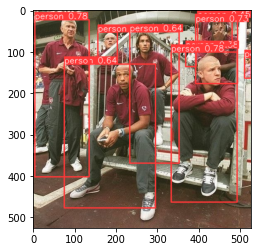

In [32]:
%matplotlib inline 
plt.imshow(np.squeeze(res.render()))
plt.show()

### Performing Detection in real time by opening webcam through OpenCv  on pretrained model weights

In [19]:
#opening the webcam
c = cv2.VideoCapture(0)

# while loop is to check the camera is open while will continue until
# it meets the flase point which is when it the command pressed q or escape
while c.isOpened():
    
#     reading frames mean reading live images
    re, f = c.read()
    
    # Making detections on live data using yolov5 pretrained weights
    re = model(f) #loading frames into model
    
    # displaying the predicted results 
    cv2.imshow('YOLO Drowisness detection', np.squeeze(re.render()))
    
    # defining when to break the loop 
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
        
# closing the camera
c.release()
cv2.destroyAllWindows()

### Generating custom data by using opencv for labeling 

In [20]:
# library to generate the unique key
import uuid
# library to read the path and create path
import os
#library to use sleep function for delay
import time

### code to make the folder and read its path

In [22]:

# performing exception handling to check the dat folder exists in dataset folder,
# if it doesn't it will create a folder
try:
    os.makedirs("dataset/dat")
except FileExistsError:
    # directory already exists
    pass
# if folder already exists it will read the path of folder 
path_images = os.path.join('dataset','dat') #reading dat folder path
img_label = ['Active','SLEEPY'] # declaring list for two classes on which I created my data set
total_images = 20 # total number of images that will be created

### code to generate the dataset

In [12]:
c = cv2.VideoCapture(0) #opening webcam
for lab in img_label: # looping through the label list
    print(("Capturing image for {} ").format(lab)) 
    time.sleep(5) # created 5 sec delay after capture image
    
    for num in range(total_images): # generating 20 images against each label
        print(("Capturing images for {} , number {}" ).format(lab,num))
        #camera reading live
        re , frams = c.read() #reading frames
#         saving images to folder with labelname and unique id in jpg format
        nameIMG = os.path.join(path_images,lab+'.'+str(uuid.uuid1())+'.jpg')
        cv2.imwrite(nameIMG,frams)
        #showing imaegs on screen
        cv2.imshow("Capturing images ", frams)
        
        time.sleep(2)
        #condtion to break the look
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

            
#closing camera            
c.release()
cv2.destroyAllWindows()
        
    

### Installing requirements to use the labelImg tool

In [14]:
!pip install pyqt5 lxml --upgrade


  Using cached lxml-4.9.1-cp310-cp310-win_amd64.whl (3.6 MB)


'pyrcc5' is not recognized as an internal or external command,
operable program or batch file.


### cloning Git repo of labelimg

In [13]:
!git clone https://github.com/tzutalin/labelImg

Cloning into 'labelImg'...
Updating files:  61% (71/115)
Updating files:  62% (72/115)
Updating files:  63% (73/115)
Updating files:  64% (74/115)
Updating files:  65% (75/115)
Updating files:  66% (76/115)
Updating files:  67% (78/115)
Updating files:  68% (79/115)
Updating files:  69% (80/115)
Updating files:  70% (81/115)
Updating files:  71% (82/115)
Updating files:  72% (83/115)
Updating files:  73% (84/115)
Updating files:  74% (86/115)
Updating files:  75% (87/115)
Updating files:  76% (88/115)
Updating files:  77% (89/115)
Updating files:  78% (90/115)
Updating files:  79% (91/115)
Updating files:  80% (92/115)
Updating files:  81% (94/115)
Updating files:  82% (95/115)
Updating files:  83% (96/115)
Updating files:  84% (97/115)
Updating files:  85% (98/115)
Updating files:  86% (99/115)
Updating files:  87% (101/115)
Updating files:  88% (102/115)
Updating files:  89% (103/115)
Updating files:  90% (104/115)
Updating files:  91% (105/115)
Updating files:  92% (106/115)
Updatin

In [23]:
#installing libraries 

In [16]:
!conda install pyqt=5
!conda install -c anaconda lxml

Solving environment: ...working... done

# All requested packages already installed.



C:\Users\HEADWAY\anaconda3\lib\site-packages\requests\__init__.py:89: RequestsDependencyWarning: urllib3 (1.26.9) or chardet (3.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "


==> WARNING: A newer version of conda exists. <==
  current version: 4.11.0
  latest version: 4.14.0

Please update conda by running

    $ conda update -n base -c defaults conda




^C


In [ ]:
# !cd labelImg && pyrcc5 -o libs/resources.py resources.qrc

###  After labeling the data below command is training pretrained model on custom data that I created above


In [41]:
!cd yolov5 && python train.py --img 320 --batch 16 --epochs 500 --data dataset.yml --weights yolov5s.pt 

train: weights=yolov5s.pt, cfg=, data=dataset.yml, hyp=data\hyps\hyp.scratch-low.yaml, epochs=500, batch_size=16, imgsz=320, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs\train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 
YOLOv5  v6.2-94-g1aea74c Python-3.10.4 torch-1.12.1+cpu CPU

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, degrees=0.0, translate=0.1, 

      1/499         0G     0.1064    0.01763    0.07517         36        320:  40%|####      | 2/5 [00:19<00:18,  6.27s/it]
      1/499         0G     0.1064    0.01763    0.07517         36        320:  60%|######    | 3/5 [00:19<00:12,  6.35s/it]
      1/499         0G     0.1044    0.01918      0.075         46        320:  60%|######    | 3/5 [00:25<00:12,  6.35s/it]
      1/499         0G     0.1044    0.01918      0.075         46        320:  80%|########  | 4/5 [00:25<00:06,  6.36s/it]
      1/499         0G     0.1056    0.01971    0.07419          6        320:  80%|########  | 4/5 [00:26<00:06,  6.36s/it]
      1/499         0G     0.1056    0.01971    0.07419          6        320: 100%|##########| 5/5 [00:26<00:00,  4.46s/it]
      1/499         0G     0.1056    0.01971    0.07419          6        320: 100%|##########| 5/5 [00:26<00:00,  5.30s/it]

                 Class     Images  Instances          P          R     mAP@.5 mAP@.5:.95:   0%|          | 0/3 [00:00<?, ?it

      6/499         0G    0.07436    0.02202    0.04985         35        320:   0%|          | 0/5 [00:07<?, ?it/s]
      6/499         0G    0.07436    0.02202    0.04985         35        320:  20%|##        | 1/5 [00:07<00:31,  7.83s/it]
      6/499         0G    0.07527    0.02255    0.04945         39        320:  20%|##        | 1/5 [00:15<00:31,  7.83s/it]
      6/499         0G    0.07527    0.02255    0.04945         39        320:  40%|####      | 2/5 [00:15<00:22,  7.53s/it]
      6/499         0G    0.07493    0.02319    0.04941         38        320:  40%|####      | 2/5 [00:23<00:22,  7.53s/it]
      6/499         0G    0.07493    0.02319    0.04941         38        320:  60%|######    | 3/5 [00:23<00:15,  7.70s/it]
      6/499         0G    0.07387    0.02296    0.04868         36        320:  60%|######    | 3/5 [00:32<00:15,  7.70s/it]
      6/499         0G    0.07387    0.02296    0.04868         36        320:  80%|########  | 4/5 [00:32<00:08,  8.34s/it]
      6/

                 Class     Images  Instances          P          R     mAP@.5 mAP@.5:.95: 100%|##########| 3/3 [00:12<00:00,  4.24s/it]
                   all         66         66     0.0569      0.502     0.0584     0.0136

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size

  0%|          | 0/5 [00:00<?, ?it/s]
     13/499         0G    0.07654    0.01699    0.03098         37        320:   0%|          | 0/5 [00:08<?, ?it/s]
     13/499         0G    0.07654    0.01699    0.03098         37        320:  20%|##        | 1/5 [00:08<00:32,  8.20s/it]
     13/499         0G    0.06658    0.01837    0.03019         39        320:  20%|##        | 1/5 [00:16<00:32,  8.20s/it]
     13/499         0G    0.06658    0.01837    0.03019         39        320:  40%|####      | 2/5 [00:16<00:24,  8.05s/it]
     13/499         0G    0.06298    0.01843    0.03001         36        320:  40%|####      | 2/5 [00:24<00:24,  8.05s/it]
     13/499         0G    0.06298    0.0

     18/499         0G    0.06883     0.0161    0.02783         35        320:  60%|######    | 3/5 [00:32<00:16,  8.26s/it]
     18/499         0G    0.06883     0.0161    0.02783         35        320:  80%|########  | 4/5 [00:32<00:08,  8.22s/it]
     18/499         0G    0.07059    0.01785    0.02834          7        320:  80%|########  | 4/5 [00:33<00:08,  8.22s/it]
     18/499         0G    0.07059    0.01785    0.02834          7        320: 100%|##########| 5/5 [00:33<00:00,  5.78s/it]
     18/499         0G    0.07059    0.01785    0.02834          7        320: 100%|##########| 5/5 [00:33<00:00,  6.75s/it]

                 Class     Images  Instances          P          R     mAP@.5 mAP@.5:.95:   0%|          | 0/3 [00:00<?, ?it/s]
                 Class     Images  Instances          P          R     mAP@.5 mAP@.5:.95:  33%|###3      | 1/3 [00:05<00:10,  5.07s/it]
                 Class     Images  Instances          P          R     mAP@.5 mAP@.5:.95:  67%|######6   | 2/3

                 Class     Images  Instances          P          R     mAP@.5 mAP@.5:.95:  33%|###3      | 1/3 [00:04<00:09,  4.66s/it]
                 Class     Images  Instances          P          R     mAP@.5 mAP@.5:.95:  67%|######6   | 2/3 [00:09<00:04,  4.77s/it]
                 Class     Images  Instances          P          R     mAP@.5 mAP@.5:.95: 100%|##########| 3/3 [00:09<00:00,  2.78s/it]
                 Class     Images  Instances          P          R     mAP@.5 mAP@.5:.95: 100%|##########| 3/3 [00:09<00:00,  3.30s/it]
                   all         66         66      0.407      0.804      0.583      0.206

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size

  0%|          | 0/5 [00:00<?, ?it/s]
     32/499         0G    0.05732    0.01564     0.0204         39        320:   0%|          | 0/5 [00:07<?, ?it/s]
     32/499         0G    0.05732    0.01564     0.0204         39        320:  20%|##        | 1/5 [00:07<00:29,  7.50s/it]
     32


                 Class     Images  Instances          P          R     mAP@.5 mAP@.5:.95:   0%|          | 0/3 [00:00<?, ?it/s]
                 Class     Images  Instances          P          R     mAP@.5 mAP@.5:.95:  33%|###3      | 1/3 [00:04<00:08,  4.46s/it]
                 Class     Images  Instances          P          R     mAP@.5 mAP@.5:.95:  67%|######6   | 2/3 [00:08<00:04,  4.40s/it]
                 Class     Images  Instances          P          R     mAP@.5 mAP@.5:.95: 100%|##########| 3/3 [00:09<00:00,  2.57s/it]
                 Class     Images  Instances          P          R     mAP@.5 mAP@.5:.95: 100%|##########| 3/3 [00:09<00:00,  3.07s/it]
                   all         66         66      0.708      0.631      0.717      0.313

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size

  0%|          | 0/5 [00:00<?, ?it/s]
     43/499         0G    0.05121    0.01262    0.01075         32        320:   0%|          | 0/5 [00:07<?, ?it/s]
   

  0%|          | 0/5 [00:00<?, ?it/s]
     66/499         0G    0.04888    0.01213     0.0153         37        320:   0%|          | 0/5 [00:10<?, ?it/s]
     66/499         0G    0.04888    0.01213     0.0153         37        320:  20%|##        | 1/5 [00:10<00:41, 10.48s/it]
     66/499         0G    0.05048    0.01086    0.01306         28        320:  20%|##        | 1/5 [00:18<00:41, 10.48s/it]
     66/499         0G    0.05048    0.01086    0.01306         28        320:  40%|####      | 2/5 [00:18<00:27,  9.15s/it]
     66/499         0G     0.0483    0.01086    0.01302         30        320:  40%|####      | 2/5 [00:28<00:27,  9.15s/it]
     66/499         0G     0.0483    0.01086    0.01302         30        320:  60%|######    | 3/5 [00:28<00:18,  9.26s/it]
     66/499         0G    0.04604    0.01101    0.01186         33        320:  60%|######    | 3/5 [00:37<00:18,  9.26s/it]
     66/499         0G    0.04604    0.01101    0.01186         33        320:  80%|########  |

     79/499         0G    0.03844    0.01353   0.009853         43        320:  20%|##        | 1/5 [00:14<00:29,  7.40s/it]
     79/499         0G    0.03844    0.01353   0.009853         43        320:  40%|####      | 2/5 [00:14<00:21,  7.33s/it]
     79/499         0G    0.03842    0.01204    0.01037         26        320:  40%|####      | 2/5 [00:22<00:21,  7.33s/it]
     79/499         0G    0.03842    0.01204    0.01037         26        320:  60%|######    | 3/5 [00:22<00:14,  7.36s/it]
     79/499         0G    0.03748    0.01169   0.009695         32        320:  60%|######    | 3/5 [00:29<00:14,  7.36s/it]
     79/499         0G    0.03748    0.01169   0.009695         32        320:  80%|########  | 4/5 [00:29<00:07,  7.47s/it]
     79/499         0G     0.0358    0.01161   0.009122          4        320:  80%|########  | 4/5 [00:30<00:07,  7.47s/it]
     79/499         0G     0.0358    0.01161   0.009122          4        320: 100%|##########| 5/5 [00:30<00:00,  5.23s/it]


     97/499         0G    0.03858    0.01178    0.01032         39        320:  40%|####      | 2/5 [00:22<00:22,  7.39s/it]
     97/499         0G    0.03858    0.01178    0.01032         39        320:  60%|######    | 3/5 [00:22<00:15,  7.50s/it]
     97/499         0G    0.03793    0.01176   0.009154         38        320:  60%|######    | 3/5 [00:29<00:15,  7.50s/it]
     97/499         0G    0.03793    0.01176   0.009154         38        320:  80%|########  | 4/5 [00:29<00:07,  7.48s/it]
     97/499         0G    0.03826    0.01319   0.008064          8        320:  80%|########  | 4/5 [00:31<00:07,  7.48s/it]
     97/499         0G    0.03826    0.01319   0.008064          8        320: 100%|##########| 5/5 [00:31<00:00,  5.20s/it]
     97/499         0G    0.03826    0.01319   0.008064          8        320: 100%|##########| 5/5 [00:31<00:00,  6.22s/it]

                 Class     Images  Instances          P          R     mAP@.5 mAP@.5:.95:   0%|          | 0/3 [00:00<?, ?it


  0%|          | 0/5 [00:00<?, ?it/s]
    123/499         0G    0.03151    0.01315   0.009177         41        320:   0%|          | 0/5 [00:08<?, ?it/s]
    123/499         0G    0.03151    0.01315   0.009177         41        320:  20%|##        | 1/5 [00:08<00:32,  8.18s/it]
    123/499         0G     0.0289    0.01146   0.006918         34        320:  20%|##        | 1/5 [00:15<00:32,  8.18s/it]
    123/499         0G     0.0289    0.01146   0.006918         34        320:  40%|####      | 2/5 [00:15<00:22,  7.63s/it]
    123/499         0G    0.02927    0.01113   0.006157         35        320:  40%|####      | 2/5 [00:22<00:22,  7.63s/it]
    123/499         0G    0.02927    0.01113   0.006157         35        320:  60%|######    | 3/5 [00:22<00:15,  7.56s/it]
    123/499         0G     0.0292    0.01096   0.006391         31        320:  60%|######    | 3/5 [00:30<00:15,  7.56s/it]
    123/499         0G     0.0292    0.01096   0.006391         31        320:  80%|########  

    152/499         0G    0.03513    0.01052   0.007021          4        320: 100%|##########| 5/5 [00:32<00:00,  5.43s/it]
    152/499         0G    0.03513    0.01052   0.007021          4        320: 100%|##########| 5/5 [00:32<00:00,  6.57s/it]

                 Class     Images  Instances          P          R     mAP@.5 mAP@.5:.95:   0%|          | 0/3 [00:00<?, ?it/s]
                 Class     Images  Instances          P          R     mAP@.5 mAP@.5:.95:  33%|###3      | 1/3 [00:04<00:08,  4.48s/it]
                 Class     Images  Instances          P          R     mAP@.5 mAP@.5:.95:  67%|######6   | 2/3 [00:09<00:04,  4.52s/it]
                 Class     Images  Instances          P          R     mAP@.5 mAP@.5:.95: 100%|##########| 3/3 [00:09<00:00,  2.63s/it]
                 Class     Images  Instances          P          R     mAP@.5 mAP@.5:.95: 100%|##########| 3/3 [00:09<00:00,  3.14s/it]
                   all         66         66      0.994      0.986      0.995

                 Class     Images  Instances          P          R     mAP@.5 mAP@.5:.95: 100%|##########| 3/3 [00:09<00:00,  3.18s/it]
                   all         66         66      0.978      0.984      0.991      0.658

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size

  0%|          | 0/5 [00:00<?, ?it/s]
    179/499         0G    0.02929    0.01235   0.005302         44        320:   0%|          | 0/5 [00:08<?, ?it/s]
    179/499         0G    0.02929    0.01235   0.005302         44        320:  20%|##        | 1/5 [00:08<00:32,  8.16s/it]
    179/499         0G    0.02899     0.0119   0.004797         42        320:  20%|##        | 1/5 [00:17<00:32,  8.16s/it]
    179/499         0G    0.02899     0.0119   0.004797         42        320:  40%|####      | 2/5 [00:17<00:25,  8.60s/it]
    179/499         0G    0.02921    0.01017   0.004637         24        320:  40%|####      | 2/5 [00:25<00:25,  8.60s/it]
    179/499         0G    0.02921    0.0


  0%|          | 0/5 [00:00<?, ?it/s]
    198/499         0G    0.02623   0.008062    0.00351         28        320:   0%|          | 0/5 [00:07<?, ?it/s]
    198/499         0G    0.02623   0.008062    0.00351         28        320:  20%|##        | 1/5 [00:07<00:29,  7.28s/it]
    198/499         0G     0.0295   0.008666    0.00489         32        320:  20%|##        | 1/5 [00:14<00:29,  7.28s/it]
    198/499         0G     0.0295   0.008666    0.00489         32        320:  40%|####      | 2/5 [00:14<00:22,  7.35s/it]
    198/499         0G     0.0284   0.008651   0.005788         33        320:  40%|####      | 2/5 [00:21<00:22,  7.35s/it]
    198/499         0G     0.0284   0.008651   0.005788         33        320:  60%|######    | 3/5 [00:21<00:14,  7.29s/it]
    198/499         0G    0.02781    0.00906   0.005855         39        320:  60%|######    | 3/5 [00:29<00:14,  7.29s/it]
    198/499         0G    0.02781    0.00906   0.005855         39        320:  80%|########  

                 Class     Images  Instances          P          R     mAP@.5 mAP@.5:.95:  67%|######6   | 2/3 [00:08<00:04,  4.50s/it]
                 Class     Images  Instances          P          R     mAP@.5 mAP@.5:.95: 100%|##########| 3/3 [00:09<00:00,  2.63s/it]
                 Class     Images  Instances          P          R     mAP@.5 mAP@.5:.95: 100%|##########| 3/3 [00:09<00:00,  3.13s/it]
                   all         66         66      0.997          1      0.995      0.642

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size

  0%|          | 0/5 [00:00<?, ?it/s]
    241/499         0G    0.03131    0.01154   0.004423         42        320:   0%|          | 0/5 [00:07<?, ?it/s]
    241/499         0G    0.03131    0.01154   0.004423         42        320:  20%|##        | 1/5 [00:07<00:30,  7.68s/it]
    241/499         0G    0.03125    0.01091   0.004759         35        320:  20%|##        | 1/5 [00:15<00:30,  7.68s/it]
    241/499       

                   all         66         66      0.998          1      0.995      0.722

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size

  0%|          | 0/5 [00:00<?, ?it/s]
    261/499         0G      0.028    0.01209   0.002451         42        320:   0%|          | 0/5 [00:07<?, ?it/s]
    261/499         0G      0.028    0.01209   0.002451         42        320:  20%|##        | 1/5 [00:07<00:28,  7.19s/it]
    261/499         0G    0.02801    0.01099   0.004623         41        320:  20%|##        | 1/5 [00:14<00:28,  7.19s/it]
    261/499         0G    0.02801    0.01099   0.004623         41        320:  40%|####      | 2/5 [00:14<00:21,  7.04s/it]
    261/499         0G    0.02742   0.009677    0.00412         31        320:  40%|####      | 2/5 [00:21<00:21,  7.04s/it]
    261/499         0G    0.02742   0.009677    0.00412         31        320:  60%|######    | 3/5 [00:21<00:14,  7.16s/it]
    261/499         0G    0.02795   0.009489   0.00

                 Class     Images  Instances          P          R     mAP@.5 mAP@.5:.95: 100%|##########| 3/3 [00:09<00:00,  2.56s/it]
                 Class     Images  Instances          P          R     mAP@.5 mAP@.5:.95: 100%|##########| 3/3 [00:09<00:00,  3.04s/it]
                   all         66         66      0.997          1      0.995      0.744

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size

  0%|          | 0/5 [00:00<?, ?it/s]
    288/499         0G    0.02553    0.00969   0.003003         36        320:   0%|          | 0/5 [00:07<?, ?it/s]
    288/499         0G    0.02553    0.00969   0.003003         36        320:  20%|##        | 1/5 [00:07<00:28,  7.12s/it]
    288/499         0G    0.02511   0.008993   0.003536         34        320:  20%|##        | 1/5 [00:14<00:28,  7.12s/it]
    288/499         0G    0.02511   0.008993   0.003536         34        320:  40%|####      | 2/5 [00:14<00:21,  7.07s/it]
    288/499         0G    0.0

    324/499         0G    0.02558   0.008917   0.005119         34        320:  40%|####      | 2/5 [00:25<00:21,  7.27s/it]
    324/499         0G    0.02558   0.008917   0.005119         34        320:  60%|######    | 3/5 [00:25<00:18,  9.14s/it]
    324/499         0G    0.02568   0.009265   0.004534         36        320:  60%|######    | 3/5 [00:33<00:18,  9.14s/it]
    324/499         0G    0.02568   0.009265   0.004534         36        320:  80%|########  | 4/5 [00:33<00:08,  8.43s/it]
    324/499         0G    0.02592    0.01022   0.003924          6        320:  80%|########  | 4/5 [00:34<00:08,  8.43s/it]
    324/499         0G    0.02592    0.01022   0.003924          6        320: 100%|##########| 5/5 [00:34<00:00,  5.77s/it]
    324/499         0G    0.02592    0.01022   0.003924          6        320: 100%|##########| 5/5 [00:34<00:00,  6.87s/it]

                 Class     Images  Instances          P          R     mAP@.5 mAP@.5:.95:   0%|          | 0/3 [00:00<?, ?it

    355/499         0G    0.02082    0.01083    0.00211         41        320:  20%|##        | 1/5 [00:14<00:29,  7.32s/it]
    355/499         0G    0.02082    0.01083    0.00211         41        320:  40%|####      | 2/5 [00:14<00:21,  7.14s/it]
    355/499         0G    0.02168    0.01062   0.002752         39        320:  40%|####      | 2/5 [00:21<00:21,  7.14s/it]
    355/499         0G    0.02168    0.01062   0.002752         39        320:  60%|######    | 3/5 [00:21<00:14,  7.10s/it]
    355/499         0G    0.02213   0.009969   0.002563         33        320:  60%|######    | 3/5 [00:28<00:14,  7.10s/it]
    355/499         0G    0.02213   0.009969   0.002563         33        320:  80%|########  | 4/5 [00:28<00:07,  7.05s/it]
    355/499         0G    0.02248   0.009834   0.002374          4        320:  80%|########  | 4/5 [00:29<00:07,  7.05s/it]
    355/499         0G    0.02248   0.009834   0.002374          4        320: 100%|##########| 5/5 [00:29<00:00,  4.95s/it]


                 Class     Images  Instances          P          R     mAP@.5 mAP@.5:.95: 100%|##########| 3/3 [00:09<00:00,  2.79s/it]
                 Class     Images  Instances          P          R     mAP@.5 mAP@.5:.95: 100%|##########| 3/3 [00:09<00:00,  3.31s/it]
                   all         66         66      0.998          1      0.995      0.799

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size

  0%|          | 0/5 [00:00<?, ?it/s]
    368/499         0G    0.01933   0.006776   0.003363         29        320:   0%|          | 0/5 [00:07<?, ?it/s]
    368/499         0G    0.01933   0.006776   0.003363         29        320:  20%|##        | 1/5 [00:07<00:31,  7.83s/it]
    368/499         0G    0.02007   0.007695   0.004829         35        320:  20%|##        | 1/5 [00:15<00:31,  7.83s/it]
    368/499         0G    0.02007   0.007695   0.004829         35        320:  40%|####      | 2/5 [00:15<00:23,  7.73s/it]
    368/499         0G    0.0

                 Class     Images  Instances          P          R     mAP@.5 mAP@.5:.95: 100%|##########| 3/3 [00:10<00:00,  3.45s/it]
                   all         66         66      0.998          1      0.995      0.808

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size

  0%|          | 0/5 [00:00<?, ?it/s]
    397/499         0G    0.01971   0.008359   0.003853         35        320:   0%|          | 0/5 [00:07<?, ?it/s]
    397/499         0G    0.01971   0.008359   0.003853         35        320:  20%|##        | 1/5 [00:07<00:31,  7.99s/it]
    397/499         0G     0.0211   0.008179   0.002937         32        320:  20%|##        | 1/5 [00:20<00:31,  7.99s/it]
    397/499         0G     0.0211   0.008179   0.002937         32        320:  40%|####      | 2/5 [00:20<00:32, 10.72s/it]
    397/499         0G    0.02009   0.007626   0.002371         31        320:  40%|####      | 2/5 [00:31<00:32, 10.72s/it]
    397/499         0G    0.02009   0.00

    420/499         0G    0.01873   0.007878   0.003317         33        320:   0%|          | 0/5 [00:07<?, ?it/s]
    420/499         0G    0.01873   0.007878   0.003317         33        320:  20%|##        | 1/5 [00:07<00:30,  7.66s/it]
    420/499         0G     0.0183    0.00844   0.002583         40        320:  20%|##        | 1/5 [00:15<00:30,  7.66s/it]
    420/499         0G     0.0183    0.00844   0.002583         40        320:  40%|####      | 2/5 [00:15<00:24,  8.04s/it]
    420/499         0G    0.01886   0.008236   0.003029         36        320:  40%|####      | 2/5 [00:27<00:24,  8.04s/it]
    420/499         0G    0.01886   0.008236   0.003029         36        320:  60%|######    | 3/5 [00:27<00:18,  9.42s/it]
    420/499         0G    0.01869   0.008621   0.003435         38        320:  60%|######    | 3/5 [00:34<00:18,  9.42s/it]
    420/499         0G    0.01869   0.008621   0.003435         38        320:  80%|########  | 4/5 [00:34<00:08,  8.78s/it]
    420/

    450/499         0G    0.02027   0.006697   0.003556         30        320:  20%|##        | 1/5 [00:07<00:30,  7.66s/it]
    450/499         0G    0.02038   0.007975   0.003563         42        320:  20%|##        | 1/5 [00:15<00:30,  7.66s/it]
    450/499         0G    0.02038   0.007975   0.003563         42        320:  40%|####      | 2/5 [00:15<00:22,  7.55s/it]
    450/499         0G    0.01966   0.008419   0.002973         38        320:  40%|####      | 2/5 [00:22<00:22,  7.55s/it]
    450/499         0G    0.01966   0.008419   0.002973         38        320:  60%|######    | 3/5 [00:22<00:15,  7.68s/it]
    450/499         0G    0.01969   0.008019   0.002771         32        320:  60%|######    | 3/5 [00:30<00:15,  7.68s/it]
    450/499         0G    0.01969   0.008019   0.002771         32        320:  80%|########  | 4/5 [00:30<00:07,  7.61s/it]
    450/499         0G    0.01911   0.008497   0.002414          6        320:  80%|########  | 4/5 [00:31<00:07,  7.61s/it]


    486/499         0G    0.01574   0.007348   0.003902         32        320:  20%|##        | 1/5 [00:07<00:30,  7.75s/it]
    486/499         0G    0.01787   0.007936   0.002958         35        320:  20%|##        | 1/5 [00:15<00:30,  7.75s/it]
    486/499         0G    0.01787   0.007936   0.002958         35        320:  40%|####      | 2/5 [00:15<00:23,  7.67s/it]
    486/499         0G    0.01842    0.00821   0.002247         38        320:  40%|####      | 2/5 [00:22<00:23,  7.67s/it]
    486/499         0G    0.01842    0.00821   0.002247         38        320:  60%|######    | 3/5 [00:22<00:15,  7.54s/it]
    486/499         0G    0.01856   0.008068   0.002328         33        320:  60%|######    | 3/5 [00:30<00:15,  7.54s/it]
    486/499         0G    0.01856   0.008068   0.002328         33        320:  80%|########  | 4/5 [00:30<00:07,  7.52s/it]
    486/499         0G    0.01739   0.007381   0.002038          3        320:  80%|########  | 4/5 [00:31<00:07,  7.52s/it]


### Loading custom model weights after training is done just to check the model results

In [24]:
#loading weights
model = torch.hub.load('ultralytics/yolov5', 'custom', path='yolov5/runs/train/exp11/weights/last.pt', force_reload=True)

Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to C:\Users\HEADWAY/.cache\torch\hub\master.zip
YOLOv5  2022-9-8 Python-3.10.4 torch-1.12.1+cpu CPU

Fusing layers... 
Model summary: 213 layers, 7055974 parameters, 0 gradients, 15.9 GFLOPs
Adding AutoShape... 


### reading image from my generated dataset for prediction

In [25]:
test_img = os.path.join('dataset','dat','Active.0b296623-2d7e-11ed-8419-801934afab44.jpg')

### passing image to custom model weights

In [28]:
image_result = model(test_img)

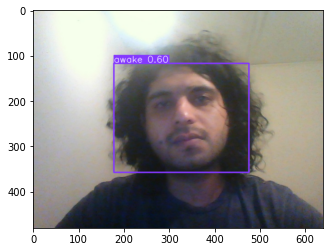

In [29]:
%matplotlib inline 
plt.imshow(np.squeeze(image_result.render()))
plt.show()

### Code to check the drowsiness in real time

In [31]:
# opening camera
c = cv2.VideoCapture(0)
# defining while loop it will run until camera close key is pressed
while c.isOpened():
    #readind frames
    r, f = c.read()
    
    # performing detection on real time data
    r = model(f)
    
    # displaying results of predicted class
    cv2.imshow('YOLO Drowisness Detection in real time', np.squeeze(r.render()))
    
    # break condition to stop the loop 
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
        
# closing camera        
c.release()
cv2.destroyAllWindows()